In [1]:
# Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

"""
1. Load the data 
1a. Extract movie ratings for 'The Lion King (1994)' and "only child" column (476)

2. Data Cleaning
2a. Remove all NaN values, row-wise
2b. Remove where only child = -1, row-wise
2c. Split the data into two groups: 1. only child, 2. with siblings 
2c. Get the median for both groups (descriptive statistics)

3. Mann-Whitney U test

4. Plotting the data

"""

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# 1. Load the data 
df = pd.read_csv('movieReplicationSet.csv', sep=',')

# 1a. Extract all movie ratings (1-400) and "only child" column (476)
data = df[['The Lion King (1994)', 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)']]
data.rename(columns = {'Are you an only child? (1: Yes; 0: No; -1: Did not respond)' : 'Only Child?'}, inplace = True)
data.head(5)

/Users/eunicepak/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,The Lion King (1994),Only Child?
0,4.0,0
1,NaN,0
2,4.0,1
3,3.0,0
4,4.0,1


In [3]:
# 2. Data Cleaning
# 2a. Remove all NaN values, row-wise
data_ = data.dropna()

# 2b. Remove where only child = -1, row-wise
data_cleaned = data_[data_['Only Child?'] != -1]

# 2c. Split the data into two groups: D1 = only child, D2 = with siblings 
D1 = data_cleaned[data_cleaned['Only Child?'] == 1]
D2 = data_cleaned[data_cleaned['Only Child?'] == 0]

# 2d. Get the median for both groups (descriptive statistics)
D1_med = np.median(D1['The Lion King (1994)'])  # only child
D2_med = np.median(D2['The Lion King (1994)'])  # with sibilings


# D1: only child # D2: siblings
D1_med, D2_med

(3.5, 4.0)

In [4]:
D1.shape

(151, 2)

In [5]:
D2.shape

(776, 2)

In [35]:
# 3. Mann-Whitney U test
u,p = stats.mannwhitneyu(D1['The Lion King (1994)'], D2['The Lion King (1994)'])

In [36]:
u,p

(52929.0, 0.04319872995682849)

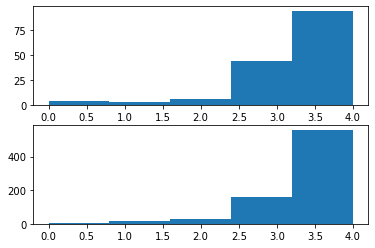

In [37]:
plt.subplot(2,1,1)
plt.hist(D1['The Lion King (1994)'], bins=5)
plt.subplot(2,1,2)
plt.hist(D2['The Lion King (1994)'], bins=5)
plt.show()